# This is a python proof-of-concept of the "[Opposite tug of war](https://www.reddit.com/r/Planetside/comments/91uuf1/a_way_to_address_snowballing_in_air_anomalies/)" idea by /u/stroff
 
 In essance the idea boils down to making sure the ratio of the points between the factions is the same as the ratio of the distances between the air anomally and the warpgates. When one faction is winning the anomaly is pushed away from that faction.

For convinience we define the map as a 1000m x 1000m space with 0 being at the center of the map. Lets get started!

In [1]:
tr_warpgate = [0, 400]  # North center
vs_warpgate = [-400, -400]  # South west
nc_warpgate = [400, -400]  # South east

anomaly = [(tr_warpgate[0] + vs_warpgate[0] + nc_warpgate[0]) / 3,
           (tr_warpgate[1] + vs_warpgate[1] + nc_warpgate[1]) / 3
           ]  # here we just compute the center of the triangle formed by the warpgates using the traditional method

We define the positions of the warpgate and the initial anomaly point between the warpages.

Note that if the anomaly doesn't look centered on the map thats because the triangle formed by the 3 warpgate points isn't always equilateral and isn't always centered within the map. Now lets start drawing!

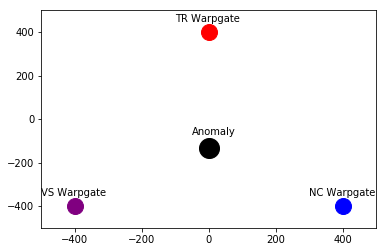

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.axis([-500, 500, -500, 500])

plt.plot(tr_warpgate[0], tr_warpgate[1], 'o', color='red', markersize=16)
plt.annotate("TR Warpgate", xy=(tr_warpgate[0]-100, tr_warpgate[1]+50))

plt.plot(vs_warpgate[0], vs_warpgate[1], 'o', color='purple', markersize=16)
plt.annotate("VS Warpgate", xy=(vs_warpgate[0]-100, vs_warpgate[1]+50))

plt.plot(nc_warpgate[0], nc_warpgate[1], 'o', color='blue', markersize=16)
plt.annotate("NC Warpgate", xy=(nc_warpgate[0]-100, nc_warpgate[1]+50))

plt.plot(anomaly[0], anomaly[1], 'o', color='black', markersize=20)
plt.annotate("Anomaly", xy=(anomaly[0]-50, anomaly[1]+60))

plt.show()

In [3]:
tr_score = 1
vs_score = 1
nc_score = 1

We initialize the starting scores to 1 point, this is to prevent divisions by 0 further down the road. 
Next we use [barycentric coordinate system](https://en.wikipedia.org/wiki/Barycentric_coordinate_system) to compute the position of the anomaly based on the faction scores. First we calculate a barycentric coefficient that we will need to apply to the anomaly's position.

In [4]:
barycoeff = (tr_score * vs_score * nc_score) / (tr_score * vs_score + vs_score * nc_score + tr_score * nc_score)

After we compute the the barycentric coefficient we need to convert back to cartesian coordinates as followes:

In [5]:
tr_coeff = barycoeff / tr_score
vs_coeff = barycoeff / vs_score
nc_coeff = barycoeff / nc_score

new_anomaly = [tr_coeff * tr_warpgate[0] + vs_coeff * vs_warpgate[0] + nc_coeff * nc_warpgate[0],
               tr_coeff * tr_warpgate[1] + vs_coeff * vs_warpgate[1] + nc_coeff * nc_warpgate[1]]

Now you're probably thinking, since the scores are all equal then the anomaly's position should not have changed from the center, lets see if that is correct.

In [6]:
print("Old anomaly", anomaly)
print("New anomaly", new_anomaly)

Old anomaly [0.0, -133.33333333333334]
New anomaly [0.0, -133.33333333333331]


Success! Now lets put everything in a nice function and then try to change the score and see what happens. Lets have TR with the most score and VS with the least. We should see the anomaly move way from the TR towards the VS.

Old anomaly [0.0, -133.33333333333334]
New anomaly [-51.612903225806434, -219.3548387096774]


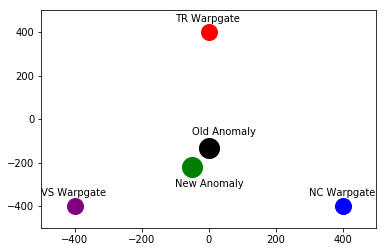

In [7]:
def calculate_anomaly_position(tr_score, vs_score, nc_score, tr_warpgate, vs_warpgate, nc_warpgate):
    barycoeff = (tr_score * vs_score * nc_score) / (tr_score * vs_score + vs_score * nc_score + tr_score * nc_score)
    tr_coeff = barycoeff / tr_score
    vs_coeff = barycoeff / vs_score
    nc_coeff = barycoeff / nc_score
    anomaly_pos = [tr_coeff * tr_warpgate[0] + vs_coeff * vs_warpgate[0] + nc_coeff * nc_warpgate[0],
                   tr_coeff * tr_warpgate[1] + vs_coeff * vs_warpgate[1] + nc_coeff * nc_warpgate[1]]
    return anomaly_pos
    

tr_score = 1000
vs_score = 500
nc_score = 700

new_anomaly = calculate_anomaly_position(tr_score, vs_score, nc_score, tr_warpgate, vs_warpgate, nc_warpgate)

print("Old anomaly", anomaly)
print("New anomaly", new_anomaly)

plt.axis([-500, 500, -500, 500])

plt.plot(tr_warpgate[0], tr_warpgate[1], 'o', color='red', markersize=16)
plt.annotate("TR Warpgate", xy=(tr_warpgate[0]-100, tr_warpgate[1]+50))

plt.plot(vs_warpgate[0], vs_warpgate[1], 'o', color='purple', markersize=16)
plt.annotate("VS Warpgate", xy=(vs_warpgate[0]-100, vs_warpgate[1]+50))

plt.plot(nc_warpgate[0], nc_warpgate[1], 'o', color='blue', markersize=16)
plt.annotate("NC Warpgate", xy=(nc_warpgate[0]-100, nc_warpgate[1]+50))

plt.plot(anomaly[0], anomaly[1], 'o', color='black', markersize=20)
plt.annotate("Old Anomaly", xy=(anomaly[0]-50, anomaly[1]+60))

plt.plot(new_anomaly[0], new_anomaly[1], 'o', color='green', markersize=20)
plt.annotate("New Anomaly", xy=(new_anomaly[0]-50, new_anomaly[1]-90))

plt.show()

anomaly = new_anomaly[:]  # we update the old position of the anomaly to the new position

Success! It moved as expected! Lets pretend somehow the VS starts to dominate leaving NC and TR behind.

Old anomaly [-51.612903225806434, -219.3548387096774]
New anomaly [207.5, -85.0]


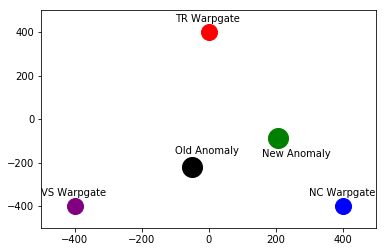

In [8]:
tr_score = 1000
vs_score = 9000
nc_score = 700

new_anomaly = calculate_anomaly_position(tr_score, vs_score, nc_score, tr_warpgate, vs_warpgate, nc_warpgate)

print("Old anomaly", anomaly)
print("New anomaly", new_anomaly)

plt.axis([-500, 500, -500, 500])

plt.plot(tr_warpgate[0], tr_warpgate[1], 'o', color='red', markersize=16)
plt.annotate("TR Warpgate", xy=(tr_warpgate[0]-100, tr_warpgate[1]+50))

plt.plot(vs_warpgate[0], vs_warpgate[1], 'o', color='purple', markersize=16)
plt.annotate("VS Warpgate", xy=(vs_warpgate[0]-100, vs_warpgate[1]+50))

plt.plot(nc_warpgate[0], nc_warpgate[1], 'o', color='blue', markersize=16)
plt.annotate("NC Warpgate", xy=(nc_warpgate[0]-100, nc_warpgate[1]+50))

plt.plot(anomaly[0], anomaly[1], 'o', color='black', markersize=20)
plt.annotate("Old Anomaly", xy=(anomaly[0]-50, anomaly[1]+60))

plt.plot(new_anomaly[0], new_anomaly[1], 'o', color='green', markersize=20)
plt.annotate("New Anomaly", xy=(new_anomaly[0]-50, new_anomaly[1]-90))

plt.show()

## Success! Now lets discuss potential issues:
1. In the inital post [Wrel said](https://www.reddit.com/r/Planetside/comments/91uuf1/a_way_to_address_snowballing_in_air_anomalies/e31mphu/) there are performance issues with a moving the anomally in real time. The method above can easily be implemented in the current system where the anomaly is updated 3-4 times during the alert.
2. If two factions are dominating then this algorithm will push the anomaly right next to the third faction's warpgate. This might make the anomaly spawn into the pain field around the warpgate. A solution to this would be to have 'virtual' warpgate coordinates set right outside the pain field. For example:

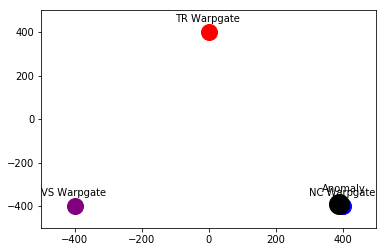

In [9]:
tr_score = 10000
vs_score = 10000
nc_score = 100

anomaly = calculate_anomaly_position(tr_score, vs_score, nc_score, tr_warpgate, vs_warpgate, nc_warpgate)

plt.axis([-500, 500, -500, 500])

plt.plot(tr_warpgate[0], tr_warpgate[1], 'o', color='red', markersize=16)
plt.annotate("TR Warpgate", xy=(tr_warpgate[0]-100, tr_warpgate[1]+50))

plt.plot(vs_warpgate[0], vs_warpgate[1], 'o', color='purple', markersize=16)
plt.annotate("VS Warpgate", xy=(vs_warpgate[0]-100, vs_warpgate[1]+50))

plt.plot(nc_warpgate[0], nc_warpgate[1], 'o', color='blue', markersize=16)
plt.annotate("NC Warpgate", xy=(nc_warpgate[0]-100, nc_warpgate[1]+50))

plt.plot(anomaly[0], anomaly[1], 'o', color='black', markersize=20)
plt.annotate("Anomaly", xy=(anomaly[0]-50, anomaly[1]+60))

plt.show()

This is not good, the anomaly is right over the warpgate. Lets add virtual warpgates outside the pain field.

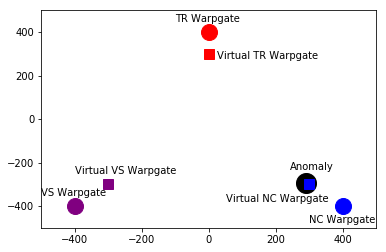

In [10]:
painfield = 100  # 100m pain field around each gate
vr_tr_warpgate = [tr_warpgate[0], tr_warpgate[1] - painfield]

vr_vs_warpgate = [vs_warpgate[0] + painfield, vs_warpgate[1] + painfield]

vr_nc_warpgate = [nc_warpgate[0] - painfield, nc_warpgate[1] + painfield]

tr_score = 10000
vs_score = 10000
nc_score = 100

anomaly = calculate_anomaly_position(tr_score, vs_score, nc_score, vr_tr_warpgate, vr_vs_warpgate, vr_nc_warpgate)

plt.axis([-500, 500, -500, 500])

plt.plot(tr_warpgate[0], tr_warpgate[1], 'o', color='red', markersize=16)
plt.annotate("TR Warpgate", xy=(tr_warpgate[0]-100, tr_warpgate[1]+50))

plt.plot(vs_warpgate[0], vs_warpgate[1], 'o', color='purple', markersize=16)
plt.annotate("VS Warpgate", xy=(vs_warpgate[0]-100, vs_warpgate[1]+50))

plt.plot(nc_warpgate[0], nc_warpgate[1], 'o', color='blue', markersize=16)
plt.annotate("NC Warpgate", xy=(nc_warpgate[0]-100, nc_warpgate[1]-75))

plt.plot(anomaly[0], anomaly[1], 'o', color='black', markersize=20)
plt.annotate("Anomaly", xy=(anomaly[0]-50, anomaly[1]+60))


plt.plot(vr_tr_warpgate[0], vr_tr_warpgate[1], 's', color='red', markersize=10)
plt.annotate("Virtual TR Warpgate", xy=(vr_tr_warpgate[0]+25, vr_tr_warpgate[1]-20))

plt.plot(vr_vs_warpgate[0], vr_vs_warpgate[1], 's', color='purple', markersize=10)
plt.annotate("Virtual VS Warpgate", xy=(vr_vs_warpgate[0]-100, vr_vs_warpgate[1]+50))

plt.plot(vr_nc_warpgate[0], vr_nc_warpgate[1], 's', color='blue', markersize=10)
plt.annotate("Virtual NC Warpgate", xy=(vr_nc_warpgate[0]-250, vr_nc_warpgate[1]-80))

plt.show()

So we see in this case the TR and VS are dominating the alert and they have to fight for the anomaly right outside the NC warpgate. This gives the NC a fighting chance because when they will be attacked they can quickly fall back inside the warpgate.